In [3]:
# imports and defaults

import importlib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import prettyplot as pp
import cn_derivations as cn
import numpy as np
import os
import data_parser as dp
import math
import mpmath
from timeit import default_timer as timer
import r_function_port as rfp
from sklearn.linear_model import LinearRegression
mpmath.dps = 30
mpmath.pretty = True

pd.options.display.max_rows = 10
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

# Time zone adjustment
import matplotlib
matplotlib.rcParams['timezone'] = 'CET'
os.getcwd()


'/home/nick/PycharmProjects/bkp/ss19-feldkurs/Pycode'

In [27]:
"""Data overview"""
filename = "2019-05-24"
station = "schiessstand"

sdf = dp.scintillometer_parse(filename)
sdf["Cn2"] = (sdf["Cn2"]) / 2032**(-3) * 1031.5**(-3)
sdf["H_convection"] = sdf["H_convection"] / 2032**(-3) * 1031.5**(-3)
sdf

,Cn2,CT2,H_convection,crosswind,sigCrosswind,pressure,temp,humidity,pathLength,pathHeight,...,<XA>(c),<YA>(c),nSigXA(c),nSigYA(c),corXAYA(c),numDgnValid,numDgnValidCrosswind,numDgnTotal,channelFlagsCombined,error
Time,,,,,,,,,,,,,,,,,,,,,
2019-05-24 05:26:00+02:00,1.461294e-15,0.000193,35.165860,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20451.6,20609.4,0.010469,0.011068,-0.004,1,0,1,0,1
2019-05-24 05:27:00+02:00,1.870824e-15,0.000248,42.046137,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20465.4,20579.2,0.013037,0.013001,0.120,2,0,2,0,1
2019-05-24 05:28:00+02:00,2.000249e-15,0.000265,44.339563,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20346.9,20589.7,0.012148,0.013691,0.048,2,0,2,0,1
2019-05-24 05:29:00+02:00,2.266287e-15,0.000300,48.926414,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20477.3,20494.0,0.013917,0.013173,0.016,2,0,2,0,1
2019-05-24 05:30:00+02:00,1.544393e-15,0.000204,36.694811,NaN,NaN,1010.0,9.0,81,2032,25.62,...,20428.3,20515.5,0.012816,0.010916,0.131,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24 16:36:00+02:00,1.141667e-14,0.001511,163.597698,NaN,NaN,1010.0,9.0,81,2032,25.62,...,17427.2,18494.8,0.029496,0.033662,0.093,2,0,2,0,1
2019-05-24 16:37:00+02:00,1.554255e-14,0.002057,205.643835,NaN,NaN,1010.0,9.0,81,2032,25.62,...,17469.0,18561.4,0.037205,0.035720,0.071,2,0,2,0,1
2019-05-24 16:38:00+02:00,1.496537e-14,0.001981,200.292508,NaN,NaN,1010.0,9.0,81,2032,25.62,...,17478.6,18564.7,0.043701,0.037374,0.280,2,0,2,0,1


In [28]:
importlib.reload(cn)
computed_data = cn.data_processor(filename, station)
cdf = computed_data["computed"]
z_eff = computed_data["effective_height"]

Please enter the stability conditions (stable, unstable, or other):
u
Mean path height: 31.83766108843537m
Effective path height: 25.62897860987237m


In [30]:
cdf

,Cn2,temperature,pressure,windspeed,wind_dir,CT2,Q_0,rho_air,H_free
Time,,,,,,,,,
2019-05-24 05:26:00+02:00,1.461294e-15,281.494682,1018.700000,0.179078,290.759511,0.001468,0.016723,1.260720,21.167556
2019-05-24 05:27:00+02:00,1.870824e-15,281.489683,1018.700000,0.177690,288.026937,0.001880,0.020127,1.260742,25.475958
2019-05-24 05:28:00+02:00,2.000249e-15,281.484685,1018.700000,0.176301,285.294363,0.002009,0.021161,1.260765,26.785972
2019-05-24 05:29:00+02:00,2.266287e-15,281.479686,1018.700000,0.174913,282.561788,0.002277,0.023238,1.260787,29.415002
2019-05-24 05:30:00+02:00,1.544393e-15,281.474688,1018.700000,0.173524,279.829214,0.001551,0.017428,1.260809,22.061726
...,...,...,...,...,...,...,...,...,...
2019-05-24 16:36:00+02:00,1.141667e-14,296.096041,1010.353959,1.832785,152.782162,0.014276,0.089781,1.188730,107.152446
2019-05-24 16:37:00+02:00,1.554255e-14,296.107710,1010.342290,1.857792,152.582106,0.019438,0.113168,1.188670,135.057037
2019-05-24 16:38:00+02:00,1.496537e-14,296.119380,1010.330620,1.882799,152.382051,0.018720,0.110014,1.188609,131.286270


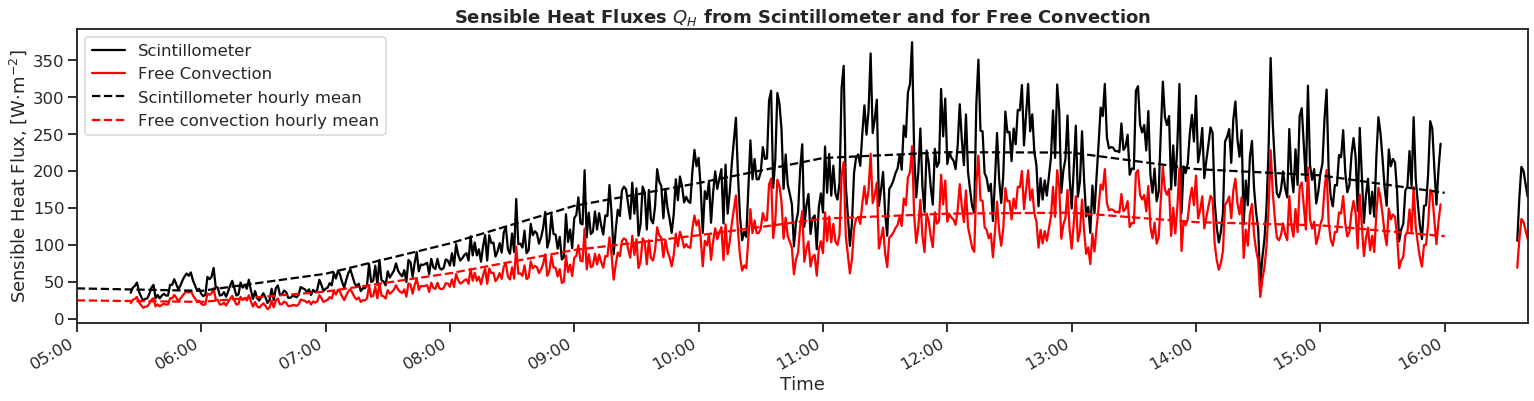

In [31]:
fig = pp.plot_free_convection(sdf, cdf)
plt.show()

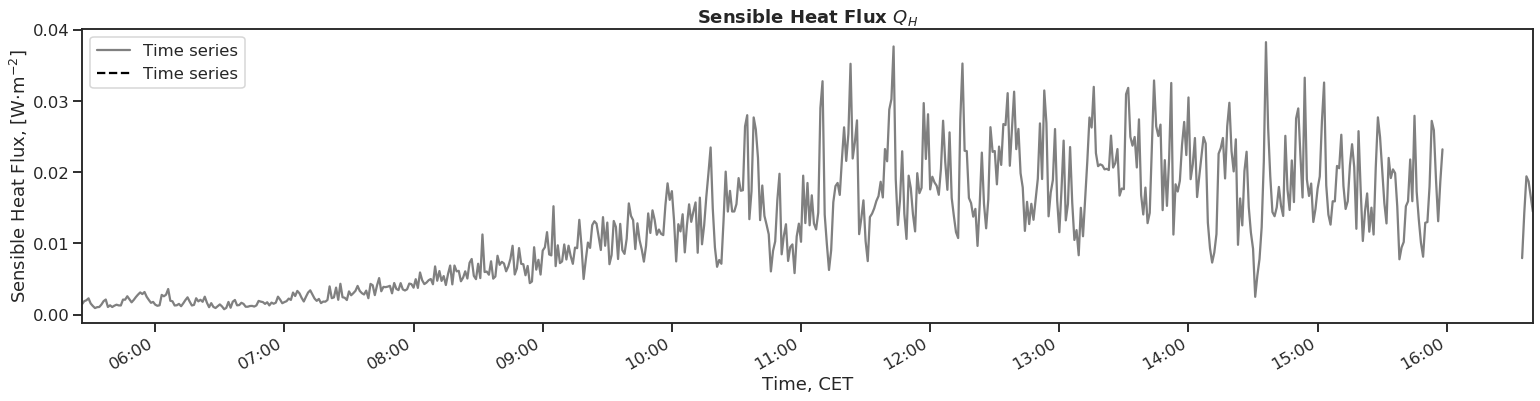

In [32]:
fig = pp.plot_generic(cdf, "CT2")
plt.show()

In [33]:
"""Ward's iteration"""
importlib.reload(rfp)

# Takes 100s or so to run
cdf_backup = cdf.copy(deep=True)  # in case of later testing

switch_time = "0557"
computed_data_stable = cn.data_processor(filename, station)

z_eff_s = computed_data["effective_height"]
cdf_stable = computed_data_stable["computed"].iloc[
    cdf.index.indexer_between_time("00:00", switch_time)].copy(deep=True)

cdf_stable = rfp.ward_method(cdf_stable, z_eff, "stable")


Please enter the stability conditions (stable, unstable, or other):
s
Mean path height: 31.83766108843537m
Effective path height: 31.34392287277671m

Iteration started


/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


6.377540349960327s

Iteration completed!


In [34]:
cdf_stable

,Cn2,temperature,pressure,windspeed,wind_dir,CT2,Q_0,rho_air,H_free,obukhov,shf,u_star,theta_star,obukhov_diff,shf_diff,l_ob
Time,,,,,,,,,,,,,,,,
2019-05-24 05:26:00+02:00,1.461294e-15,281.494682,1018.7,0.179078,290.759511,0.001468,0.020452,1.260720,25.887658,-1.444830,0.968374,0.0248786,-0.0307309,-201.445,<class 'float'>,-1.444830
2019-05-24 05:27:00+02:00,1.870824e-15,281.489683,1018.7,0.177690,288.026937,0.001880,0.024615,1.260742,31.156780,-1.257234,1.08718,0.0246857,-0.0347702,-201.257,<class 'float'>,-1.257234
2019-05-24 05:28:00+02:00,2.000249e-15,281.484685,1018.7,0.176301,285.294363,0.002009,0.025880,1.260765,32.758911,-1.196972,1.11536,0.0244928,-0.0359516,-201.197,<class 'float'>,-1.196972
2019-05-24 05:29:00+02:00,2.266287e-15,281.479686,1018.7,0.174913,282.561788,0.002277,0.028419,1.260787,35.974182,-1.106901,1.17784,0.0242999,-0.0382664,-201.107,<class 'float'>,-1.106901
2019-05-24 05:30:00+02:00,1.544393e-15,281.474688,1018.7,0.173524,279.829214,0.001551,0.021315,1.260809,26.981218,-1.319691,0.964583,0.024107,-0.0315881,-201.32,<class 'float'>,-1.319691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24 05:53:00+02:00,3.100864e-15,281.359720,1018.7,0.141589,216.980006,0.003110,0.035915,1.261325,45.481958,-0.620332,1.11479,0.0196703,-0.0447231,-200.62,<class 'float'>,-0.620332
2019-05-24 05:54:00+02:00,2.872821e-15,281.354721,1018.7,0.140200,214.247431,0.002881,0.033914,1.261347,42.948399,-0.631915,1.06247,0.0194774,-0.0430456,-200.632,<class 'float'>,-0.631915
2019-05-24 05:55:00+02:00,3.160799e-15,281.349722,1018.7,0.138812,211.514857,0.003169,0.036431,1.261369,46.137240,-0.590578,1.1034,0.0192845,-0.04515,-200.591,<class 'float'>,-0.590578


In [35]:
switch_time = "0557"
computed_data_unstable = cn.data_processor(filename, station)
z_eff_u = computed_data["effective_height"]

cdf_unstable = computed_data_unstable["computed"].iloc[
    cdf.index.indexer_between_time(switch_time, "23:59")].copy(deep=True)

cdf_unstable = rfp.ward_method(cdf_unstable, z_eff_u, "unstable")

Please enter the stability conditions (stable, unstable, or other):
u
Mean path height: 31.83766108843537m
Effective path height: 25.62897860987237m

Iteration started
136.41457676887512s

Iteration completed!


In [57]:
cdf_stable["shf"] = -cdf_stable["shf"]
cdf_stable["obukhov"] = -cdf_stable["obukhov"]

cdf = cdf_stable.append(cdf_unstable,sort=True)

In [58]:
cdf

,CT2,Cn2,H_free,Q_0,l_ob,obukhov,obukhov_diff,pressure,rho_air,shf,shf_diff,temperature,theta_star,u_star,wind_dir,windspeed
Time,,,,,,,,,,,,,,,,
2019-05-24 05:26:00+02:00,0.001468,1.461294e-15,25.887658,0.020452,-1.444830,1.444830,-201.445,1018.700000,1.260720,-0.968374,<class 'float'>,281.494682,-0.0307309,0.0248786,290.759511,0.179078
2019-05-24 05:27:00+02:00,0.001880,1.870824e-15,31.156780,0.024615,-1.257234,1.257234,-201.257,1018.700000,1.260742,-1.08718,<class 'float'>,281.489683,-0.0347702,0.0246857,288.026937,0.177690
2019-05-24 05:28:00+02:00,0.002009,2.000249e-15,32.758911,0.025880,-1.196972,1.196972,-201.197,1018.700000,1.260765,-1.11536,<class 'float'>,281.484685,-0.0359516,0.0244928,285.294363,0.176301
2019-05-24 05:29:00+02:00,0.002277,2.266287e-15,35.974182,0.028419,-1.106901,1.106901,-201.107,1018.700000,1.260787,-1.17784,<class 'float'>,281.479686,-0.0382664,0.0242999,282.561788,0.174913
2019-05-24 05:30:00+02:00,0.001551,1.544393e-15,26.981218,0.021315,-1.319691,1.319691,-201.32,1018.700000,1.260809,-0.964583,<class 'float'>,281.474688,-0.0315881,0.024107,279.829214,0.173524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24 16:36:00+02:00,0.014276,1.141667e-14,107.152446,0.089781,-54.172118,-54.172118,45.8279,1010.353959,1.188730,102.853,<class 'float'>,296.096041,-0.217796,0.395422,152.782162,1.832785
2019-05-24 16:37:00+02:00,0.019438,1.554255e-14,135.057037,0.113168,-47.701660,-47.701660,52.2983,1010.342290,1.188670,121.65,<class 'float'>,296.107710,-0.254144,0.400817,152.582106,1.857792
2019-05-24 16:38:00+02:00,0.018720,1.496537e-14,131.286270,0.110014,-49.927804,-49.927804,50.0722,1010.330620,1.188609,120.981,<class 'float'>,296.119380,-0.249403,0.406212,152.382051,1.882799


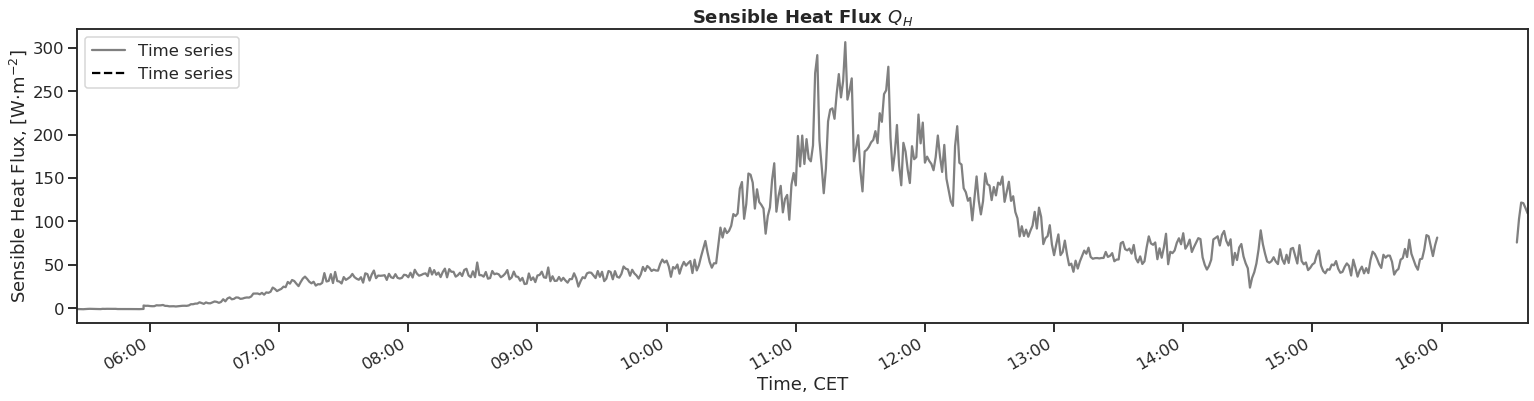

In [59]:
import importlib
importlib.reload(pp)
fig = pp.plot_generic(cdf, "shf")
plt.show()

In [60]:
header_list = ["year", "month", "day", "hour", "minute", "second", "shf", "windspeed", "obukhov"]
rooftop = pd.read_csv("../../data/weather_data/rooftop.csv",
                           header=None, skiprows=1, index_col=None,
                           names=header_list, sep=",")

t_cols = ['year', 'month', 'day', 'hour', 'minute', "second"]
rooftop.index = pd.to_datetime(rooftop[t_cols])

# Remove the useless columns
rooftop = rooftop.drop(t_cols, axis=1)
rooftop = rooftop.replace(-999, np.nan)
rooftop = rooftop.fillna(method="ffill")

oidx = rooftop.index
nidx = pd.date_range(oidx.min(), oidx.max(), freq='60s')
rooftop = rooftop.reindex(oidx.union(nidx)).interpolate(
    'index').reindex(nidx).tz_localize("UTC")
rooftop.index = rooftop.index + pd.DateOffset(hours=1)
rooftop

,shf,windspeed,obukhov
2019-05-24 03:30:00+00:00,-0.703230,0.524850,224.750000
2019-05-24 03:31:00+00:00,-0.512149,0.533095,216.650333
2019-05-24 03:32:00+00:00,-0.321068,0.541340,208.550667
2019-05-24 03:33:00+00:00,-0.129987,0.549585,200.451000
2019-05-24 03:34:00+00:00,0.061094,0.557830,192.351333
...,...,...,...
2019-05-24 14:56:00+00:00,198.220667,3.585713,-40.309000
2019-05-24 14:57:00+00:00,198.543000,3.627560,-40.407000
2019-05-24 14:58:00+00:00,198.865333,3.669407,-40.505000
2019-05-24 14:59:00+00:00,199.187667,3.711253,-40.603000


In [45]:
wdf = dp.weather_download("2019-05-24")
wdf = wdf.loc["2019-05-24 03:30":"2019-05-24 15:00"]
wdf

,t,rf,wr,wg,regen,ldred,ldstat,sonne
2019-05-24 03:30:00+00:00,8.324688,86.251041,279.829214,0.624688,0.0,1018.700000,949.574896,0.0
2019-05-24 03:31:00+00:00,8.319689,86.267703,277.096640,0.619689,0.0,1018.700000,949.573230,0.0
2019-05-24 03:32:00+00:00,8.314690,86.284365,274.364066,0.614690,0.0,1018.700000,949.571563,0.0
2019-05-24 03:33:00+00:00,8.309692,86.301027,271.631491,0.609692,0.0,1018.700000,949.569897,0.0
2019-05-24 03:34:00+00:00,8.304693,86.317690,268.898917,0.604693,0.0,1018.700000,949.568231,0.0
...,...,...,...,...,...,...,...,...
2019-05-24 14:56:00+00:00,23.179439,31.945263,148.781050,8.398527,0.0,1010.120561,944.857544,100.0
2019-05-24 14:57:00+00:00,23.191109,31.895249,148.580995,8.488552,0.0,1010.108891,944.849208,100.0
2019-05-24 14:58:00+00:00,23.202779,31.845235,148.380939,8.578577,0.0,1010.097221,944.840872,100.0
2019-05-24 14:59:00+00:00,23.214448,31.795221,148.180884,8.668602,0.0,1010.085552,944.832537,100.0


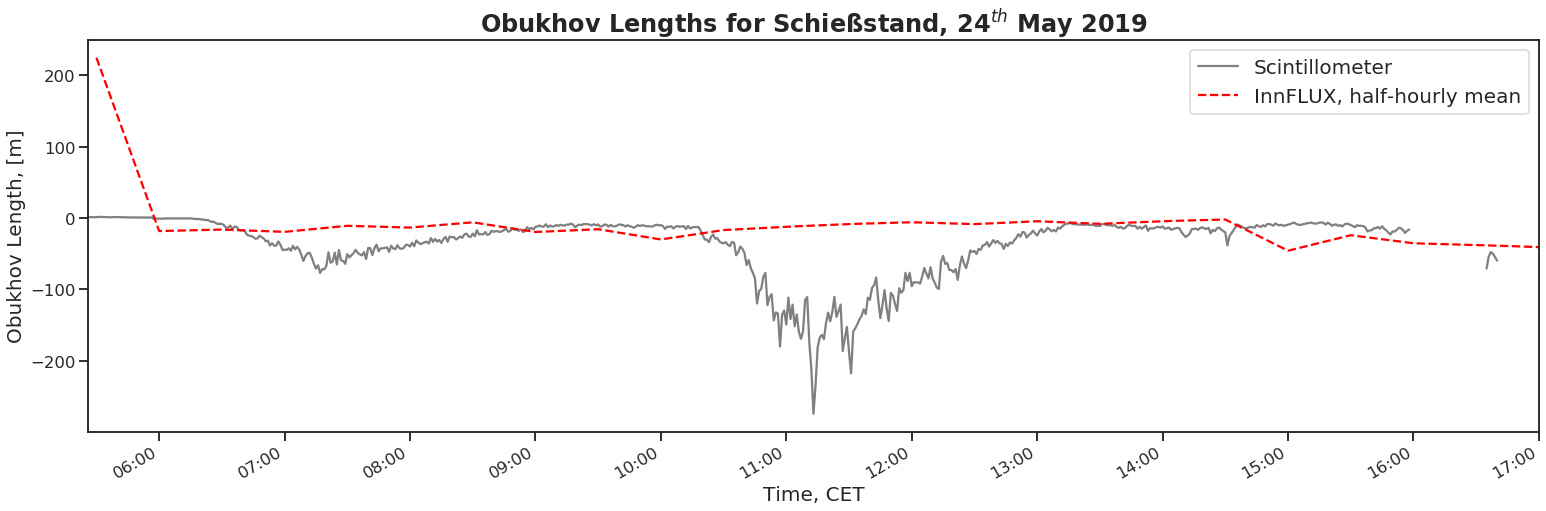

In [98]:
hourly_cdf = pd.DataFrame()
hourly_cdf["ob_mean"] = 0
# hourly_cdf["shf_std"] = hourly_cdf["shf"].astype("float64").resample("H").std()
hourly_cdf["ob_mean"] = cdf["obukhov"].astype("float64").resample("600S").mean()

hourly_roof = pd.DataFrame()
hourly_roof["ob_mean"] = 0
# hourly_cdf["shf_std"] = hourly_cdf["shf"].astype("float64").resample("H").std()
hourly_roof["_mean"] = rooftop["obukhov"].astype("float64").resample("600S").mean()

fig = plt.figure(figsize=(26, 8))
(cdf["obukhov"]).astype("float64").plot(color="grey", label="Scintillometer")
# hourly_cdf["windspeed_mean"].astype("float64").plot(
#     color="black", linestyle="dashed", label="Scintillometer, hourly mean")

(rooftop["obukhov"]).astype("float64").plot(color="red", linestyle = "dashed", label="InnFLUX, half-hourly mean")
# wdf["wg"].astype("float64").plot(color="black", linestyle="dashed", label="ZAMG Hourly Mean")

plt.legend(loc="upper right", fontsize = 20)
plt.xlabel("Time, CET", fontsize = 20)
# plt.ylabel("Mean Wind Speeds, [m$\cdot$s$^{-2}$]", fontsize = 20)
plt.ylabel("Obukhov Length, [m]", fontsize=20)
plt.title("Obukhov Lengths for Schießstand, 24$^{th}$ May 2019", fontweight="bold", fontsize = 24)
ax = plt.gca()
ax.xaxis.set_major_formatter(
    dates.DateFormatter('%H:%M'))  # hours and minutes
plt.show()

# fig.savefig('./plots/ZAMG/obukhov_series.png', bbox_inches='tight')

In [ ]:
cdf["shf"].iloc[4:]

In [ ]:
rooftop["shf"].iloc[:611]

In [90]:
df = pd.DataFrame()
# df = cdf.filter([""])
df["shf"] = cdf["shf"].iloc[4:].astype("float")
df["roof_shf"] = rooftop["shf"].iloc[:611].astype("float")
df = df.dropna()
X = df["shf"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df["roof_shf"].iloc[:611].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

In [104]:
df = pd.DataFrame()
# df = cdf.filter([""])
df["obukhov"] = cdf_unstable["obukhov"].iloc[4:].astype("float")
df["roof_ob"] = rooftop["obukhov"].iloc[:611].astype("float")
# df = df[df["obukhov"] !=0]
df = df.dropna()
X = df["obukhov"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df["roof_ob"].iloc[:611].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

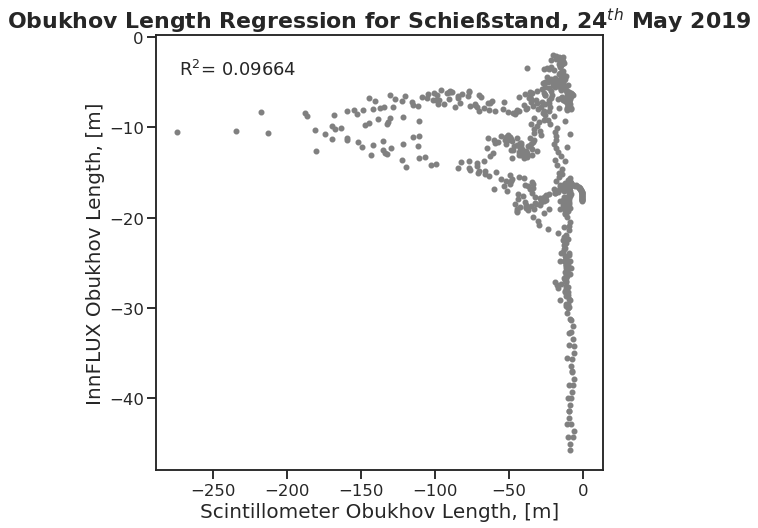

In [111]:

fig = plt.figure(figsize=(8, 8))

plt.scatter(X, Y, marker=".", color="gray")
plt.title("Obukhov Length Regression for Schießstand, 24$^{th}$ May 2019", fontweight="bold", fontsize = 22)
# plt.xlabel("Scintillometer Flux", fontsize = 20)
plt.ylabel("InnFLUX Obukhov Length, [m]", fontsize = 20)
ax = plt.gca()
ax.set_xlabel("Scintillometer Obukhov Length, [m]", fontsize = 20)

# Linear Regression

linear_regressor = LinearRegression()  # create object for the class
reg = linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions
# plt.plot(X, Y_pred, color='black')

plt.text(0.05, 0.9, str("R$^{2}$= " + str(round(reg.score(X,Y), 5))), horizontalalignment='left',
     verticalalignment='bottom', transform=ax.transAxes)

plt.show()
# 
# fig.savefig('./plots/lob_reg_clean.png', bbox_inches='tight')

In [ ]:
hourly_cdf["obukhov_mean"] = 0
# hourly_cdf["shf_std"] = hourly_cdf["shf"].astype("float64").resample("H").std()
hourly_cdf["obukhov_mean"] = cdf["obukhov"].astype("float64").resample("600S").mean()

fig = plt.figure(figsize=(26, 6))
cdf["obukhov"].astype("float64").plot(color="grey", label="Time series")
hourly_cdf["obukhov_mean"].astype("float64").plot(
    color="black", linestyle="dashed", label="10-minute mean")

plt.legend(loc="lower left")
plt.xlabel("Time, CET")
ax = plt.gca()
ax.xaxis.set_major_formatter(
    dates.DateFormatter('%H:%M'))  # hours and minutes
plt.show()

In [ ]:
fig = plt.figure(figsize=(26, 6))
cdf = cdf.tz_convert("UTC")
# sdf["H_convection"].plot(color="black", label="Scintillometer")
cdf["shf"].plot(color="red", label="Iterated Flux")

plt.legend(loc="upper left")
plt.title(
    r"Sensible Heat Fluxes $Q_{H}$ from Scintillometer and from Iteration",
    fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
ax = plt.gca()
ax.xaxis.set_major_formatter(
    dates.DateFormatter('%H:%M'))  # hours and minutes

In [ ]:
cdf

In [ ]:
cdf_backup = cdf.copy()

In [ ]:
cdf = cdf.tz_convert("UTC")

In [ ]:
z_eff

In [ ]:
column_headers = ["yyyy", "MM", "day", "HH", "MM", "zm", "d", "z0",
                  "u_mean", "L", "sigma_v", "u_star", "wind_dir",
                  "temperature, pressure, windspeed, shf, H_free, obukhov"]
ndf = cdf.copy().filter(["wind_dir", "temperature", "pressure", "windspeed", "shf", "H_free", "obukhov"])

ndf["yyyy"] = cdf.index.year
ndf["mm"] = cdf.index.month
ndf["day"] = cdf.index.day
ndf["HH"] = cdf.index.hour
ndf["MM"] = cdf.index.minute
ndf["zm"] = 40.9
ndf["d"] = 0.7 * 12
ndf["z0"] = -999
ndf["u_mean"] = cdf["windspeed"].mean()
ndf["L"] = cdf["obukhov"].fillna(value=-999)
ndf["sigma_v"] = (np.sqrt(((cdf["windspeed"]-ndf["u_mean"])**2)).mean())
ndf["sigma_v"] = ndf["sigma_v"].fillna(value=-999)
ndf["u_star"] = cdf["u_star"].fillna(value=-999)
ndf["wind_dir"] = cdf["wind_dir"].fillna(value=-999)
ndf

In [ ]:
# ndf.to_csv(path_or_buf="../ffp/ffp_midpoint.csv", index=None) 

In [ ]:
column_headers = ["yyyy", "MM", "day", "HH", "MM", "zm", "d", "z0", "u_mean", "L", "sigma_v", "u_star", "wind_dir"]
ndf = cdf.copy().filter("wind_dir")

ndf["yyyy"] = cdf.index.year
ndf["mm"] = cdf.index.month
ndf["day"] = cdf.index.day
ndf["HH"] = cdf.index.hour
ndf["MM"] = cdf.index.minute
ndf["zm"] = 31.42
ndf["d"] = 0.7 * 12
ndf["z0"] = -999
ndf["u_mean"] = cdf["windspeed"].mean()
ndf["L"] = cdf["obukhov"].fillna(value=-999)
ndf["sigma_v"] = (np.sqrt(((cdf["windspeed"]-ndf["u_mean"])**2)).mean())
ndf["sigma_v"] = ndf["sigma_v"].fillna(value=-999)
ndf["u_star"] = cdf["u_star"].fillna(value=-999)
ndf["wind_dir"] = cdf["wind_dir"].fillna(value=-999)
ndf

In [ ]:
ndf_backup = ndf.copy()
ndf = ndf.reset_index(drop=True)
ndf

In [ ]:
# ndf.to_csv(path_or_buf="../ffp/ffp_hq1.csv", index=None)
